In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/DanilaK10/Heart-Disease-Prediction-Team2/main/Heart%20Disease%20Dataset.csv?token=GHSAT0AAAAAACJQ5NFZMLRE7U42M5JNE2GYZJ6U6KQ")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Rename origical columns
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp',
              'Cholesterol', 'Fasting_bs', 'Resting_ecg',
              'Max_heart_rate', 'Exercise_induced_angina',
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']

# **4-5. Heart Functions for Heart Disease**

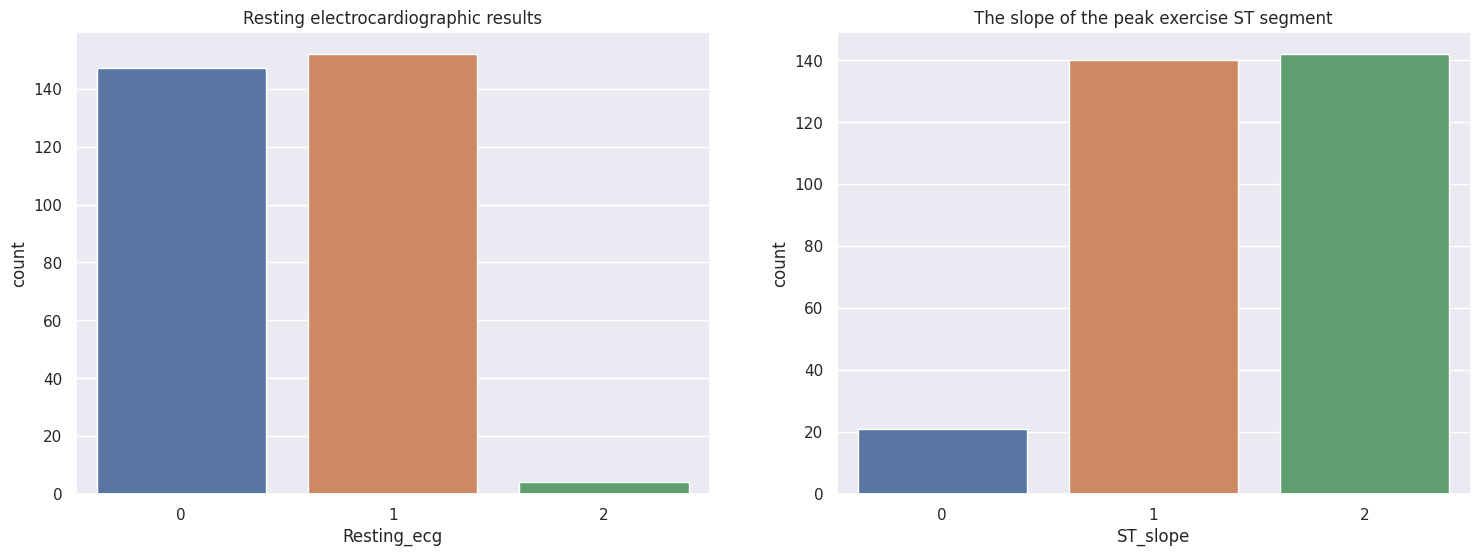

In [ ]:
def heart_functions(data):
    """
    Make a bar chart of Resting_ecg and ST_slope.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    sns.countplot(x='Resting_ecg', data=data)
    plt.title('Resting electrocardiographic results')

    # ST_slope
    plt.subplot(1, 2, 2)
    sns.countplot(x='ST_slope', data=data)
    plt.title('The slope of the peak exercise ST segment')
    plt.show()


heart_functions(df);

Heart Functions 1. Resting_ecg: Resting electrocardiographic results¶
Electrocardiography (ECG) is a test to assess the heart rate and rhythm. This test can detect heart disease, heart attack, enlarged heart and abnormal heart rhythm.

0 = Normal
1 = Abnormal ST-T wave
2 = Showing probable or definite left ventricular hypertrophy
What is the left ventricular hypertrophy (LVH)?
Left Ventricular Hypertrophy (LVH) is enlargement and thckening of the walls of your heart, left ventricle. This causes overwork of the heart muscle.

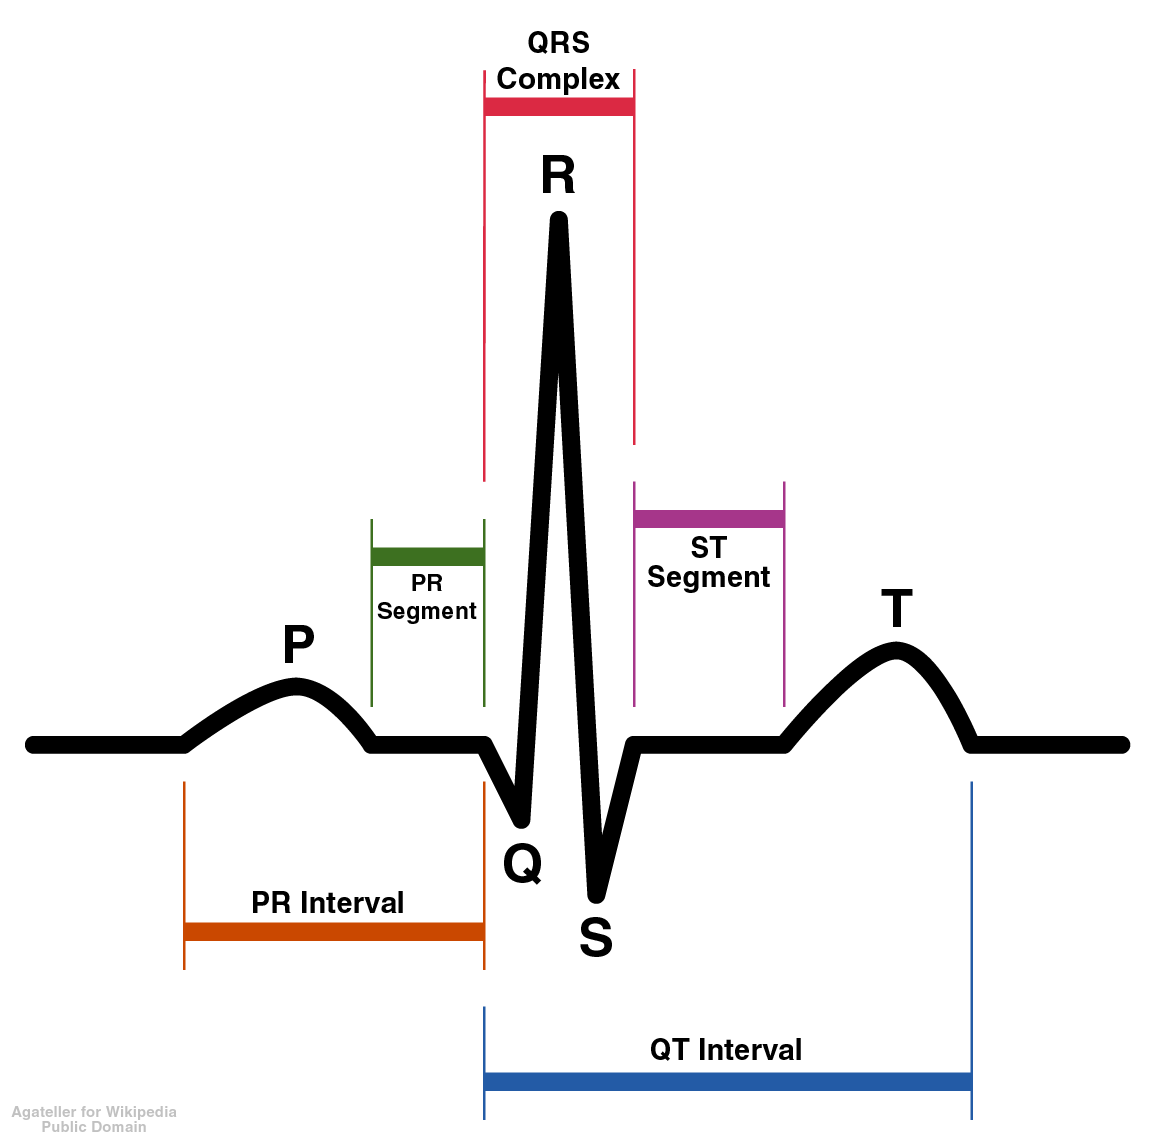


Heart Functions 2. ST_slope: The slope of the peak exercise ST segment¶

・0 = Upsloping
・1 = Horizontal
・2 = Downsloping

Horizontal and downsloping ST depression is more than 0.5 mm indicates myocardial ischemia, blackaged blood stream to the heart muscle in a coronary artery.

On the other hand, upsloping ST depression is typically shown by physical activity.

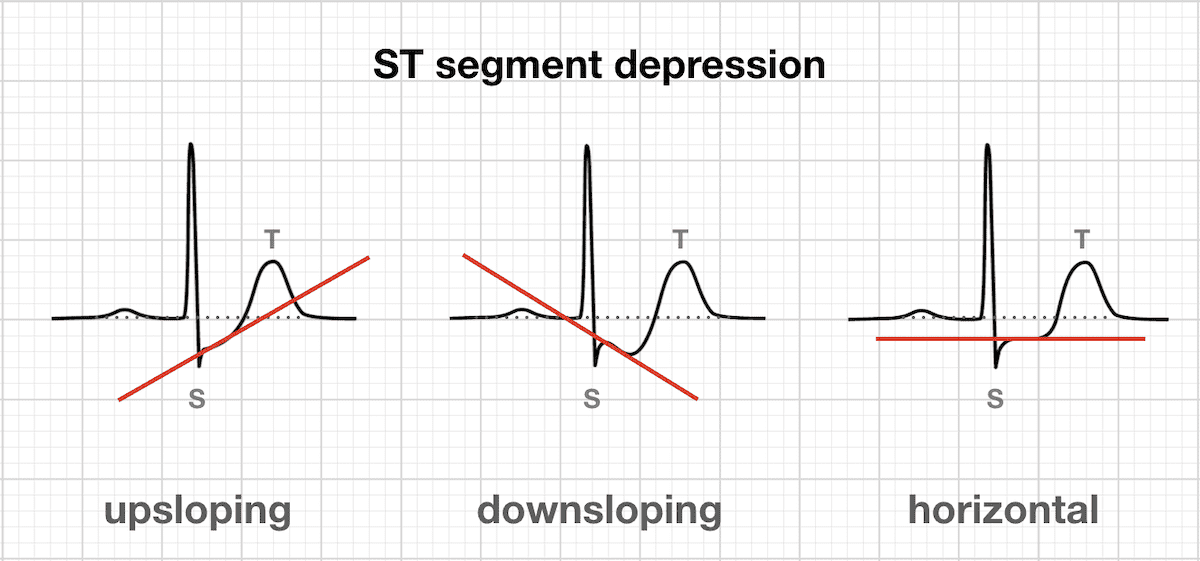

DESC:The graph on the left shows ST-T wave abnormalities. ST-T changes with an obvious cause are called specific ST-T changes. On the other hand, ST-T changes of unknown cause are referred to as non-specific ST-T changes. It is also indicative of the low likelihood of left ventricular hypertrophy.

The graph on the right shows fewer upslopes and more horizontals and downslopes.As I mentioned above, horizontal and downsloping ST depression is more than 0.5 mm indicates myocardial ischemia, blackaged blood stream to the heart muscle in a coronary artery.

**Observations**

・Showing probable or definite left ventricular hypertrophy (= 2) rarely shows, but the half of the subjects has abnormal ST-T wave (= 1). ST_slope

・Most ST_slope values show abnormalities, holizontal (= 1) , 140, and downsloping (= 2), over 140.

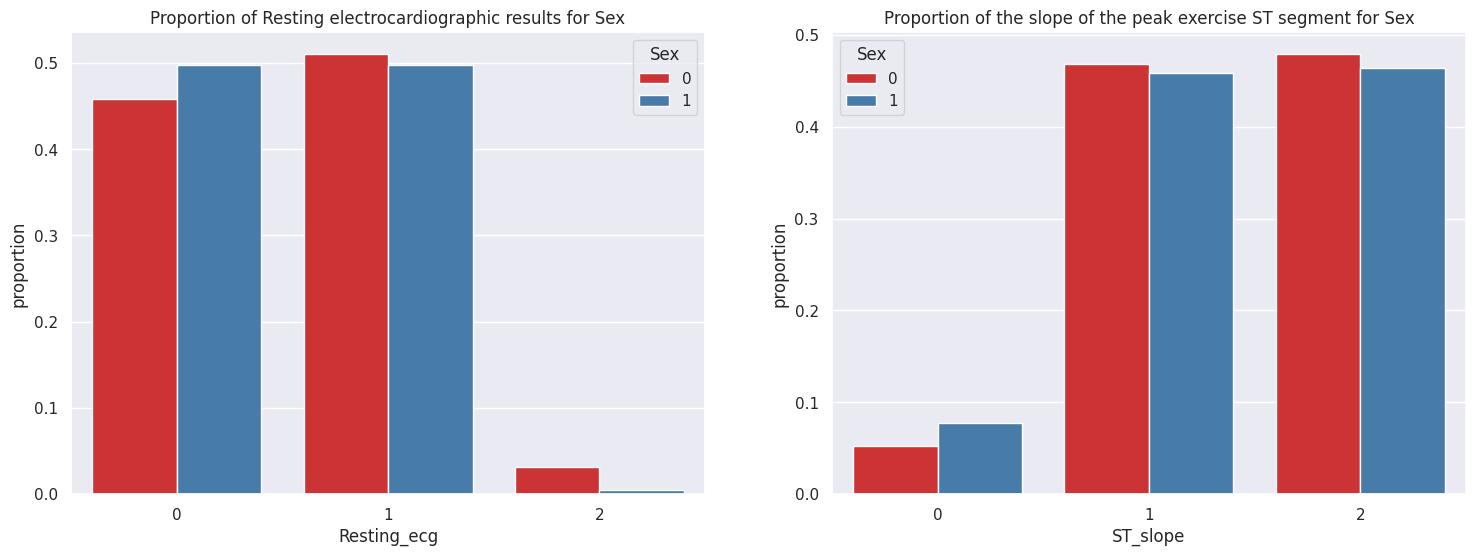

In [ ]:
def heart_functions_sex(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Resting electrocardiographic results for Sex')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of the slope of the peak exercise ST segment for Sex')
    plt.show()


heart_functions_sex(df);


The graph above shows the percentages when divided by gender.

**Observations**
#Resting_ecg

Abnormal ST-T wave (= 1), over 50%, and showing probable or definite left ventricular hypertrophy (= 2) in Female are the slightly larger than Male.

#ST_slope

In both holizontal abnormal (=1) and downsloping abnormality (= 2), Female has more abnormalities than Male.

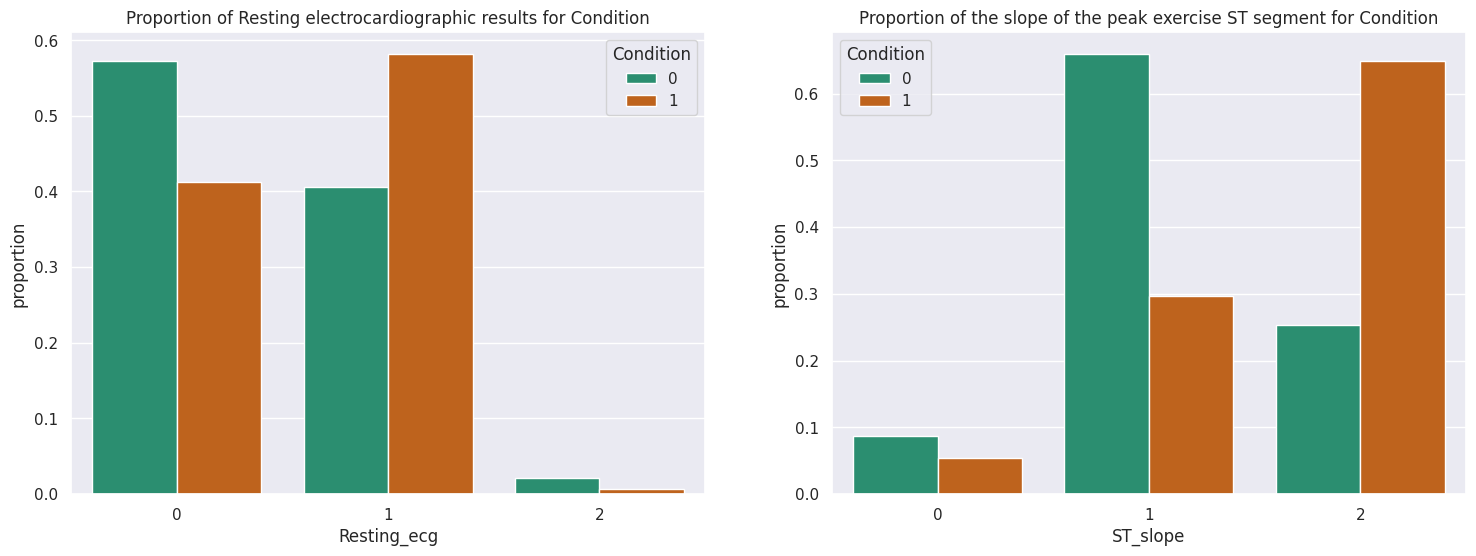

In [ ]:
def heart_functions_condition(data):
    """
    Plot the proportion of Resting_exc and ST_slope for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Resting electrocardiographic results for Condition')


    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of the slope of the peak exercise ST segment for Condition')
    plt.show()


heart_functions_condition(df);



(0 = Benign , 1 = Malignant )

**Observations**
#Resting_ecg

・Normal ST-T wave (= 0) proportion is over 50%, but it contributes to Malignant. It seems that people who have normal ST-T wave still have the risk of heart disease.
・Abnormal ST-T wave (= 1) clearly associates with Malignant condition, about 58%.

#ST_depression

・Downsloping (= 2) abiously shows that it contributes to Malignant, but the other horizontal (= 1), over 60%, is more likely to be shown as Benign even though it is a type of abnormal ST-segment depressions.

#Heart Functions 3↓
ST_depression: ST-segment depression induced by exercise relative to rest

Normal ST-segment depression is flat or up to 0.5 mm.

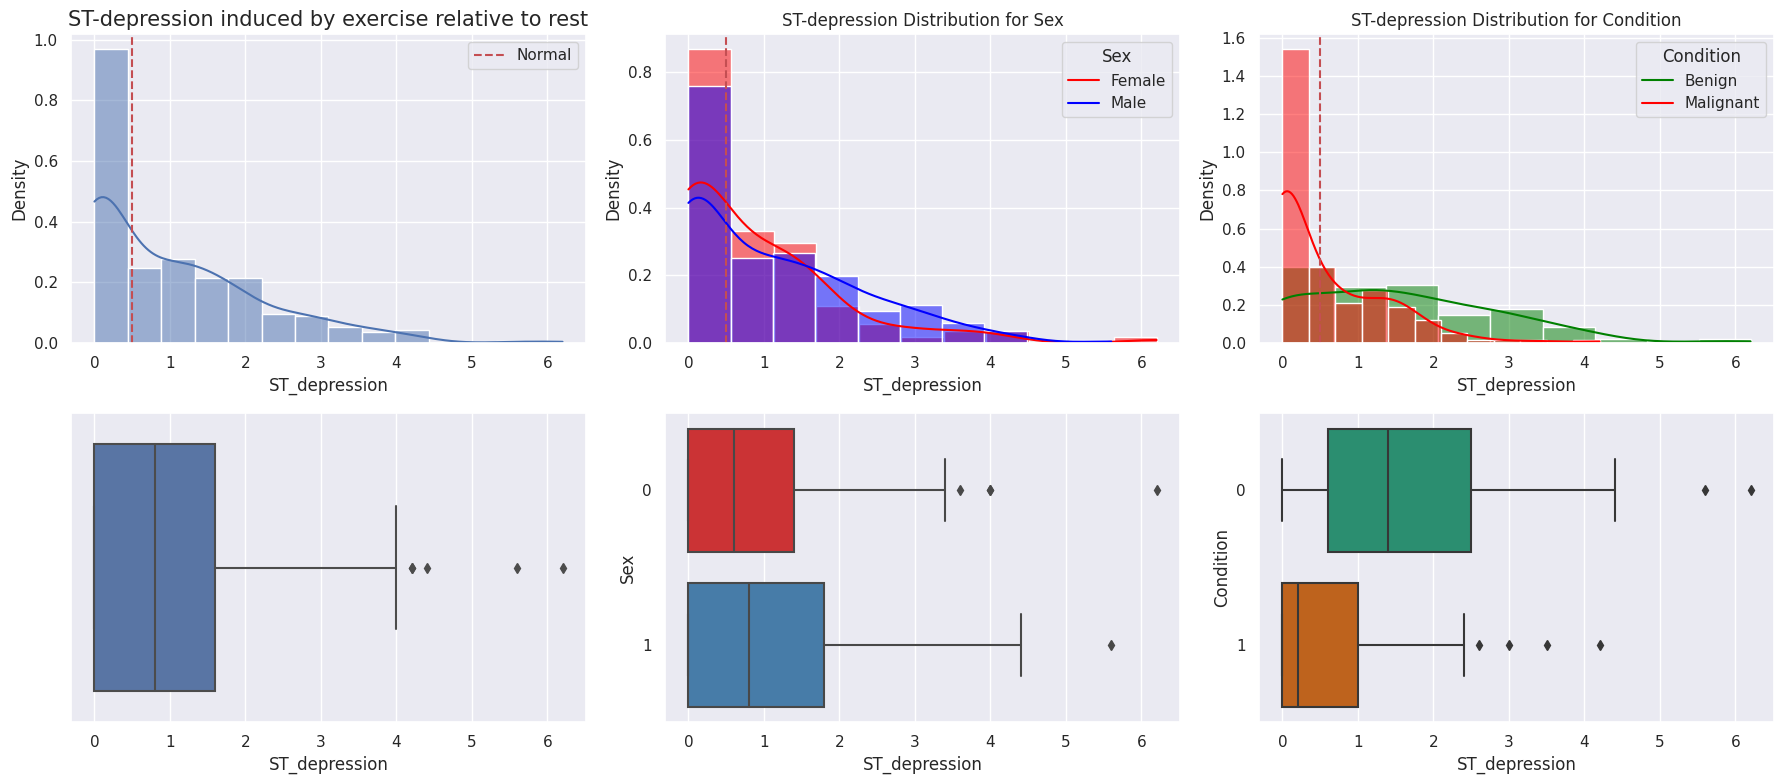

In [ ]:
def heart_functions_sex(data):
    """
    Make a standard distribution of ST_depression and distributions for Sex and Condition.
    """
    fig = plt.figure(figsize=(18, 8))

    # ST-depression induced by exercise relative to rest
    plt.subplot(2, 3, 1)
    sns.histplot(data['ST_depression'], stat='density', kde = True)
    plt.title('ST-depression induced by exercise relative to rest', fontsize=15)
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['ST_depression'], orient='h')


    # ST-depression for Sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['ST_depression']
    chol_male = data[data['Sex']==1]['ST_depression']
    sns.histplot(chol_female, color='Red', stat='density', kde = True)
    sns.histplot(chol_male, color='Blue', stat='density', kde = True)
    plt.title('ST-depression Distribution for Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['ST_depression'], y=data['Sex'],
                palette='Set1', orient='h')


    # ST-depression for Condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['ST_depression']
    thalach_m = data[data['Condition']==1]['ST_depression']
    sns.histplot(thalach_b, color='Green', stat='density', kde = True)
    sns.histplot(thalach_m, color='Red', stat='density', kde = True)
    plt.title('ST-depression Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['ST_depression'], y=data['Condition'],
                palette='Dark2', orient='h')


    plt.tight_layout()

    plt.show()


heart_functions_sex(df);

**Observations**

・ST_depression shows right-skewed distribution. The majority of the value is less than value 1.

・The distribution of Female and Male are as same as total distribution.

・Benign is widely distributed. However, Malignant is a tightly right-skewed distribution and has several outliers. Normal ST-segment depression is flat or up to 0.5 mm, but the ST_depression value for Condition does not clearly affect Malignant.

#The image below is the explanation of mesurement of ST-segment deviation

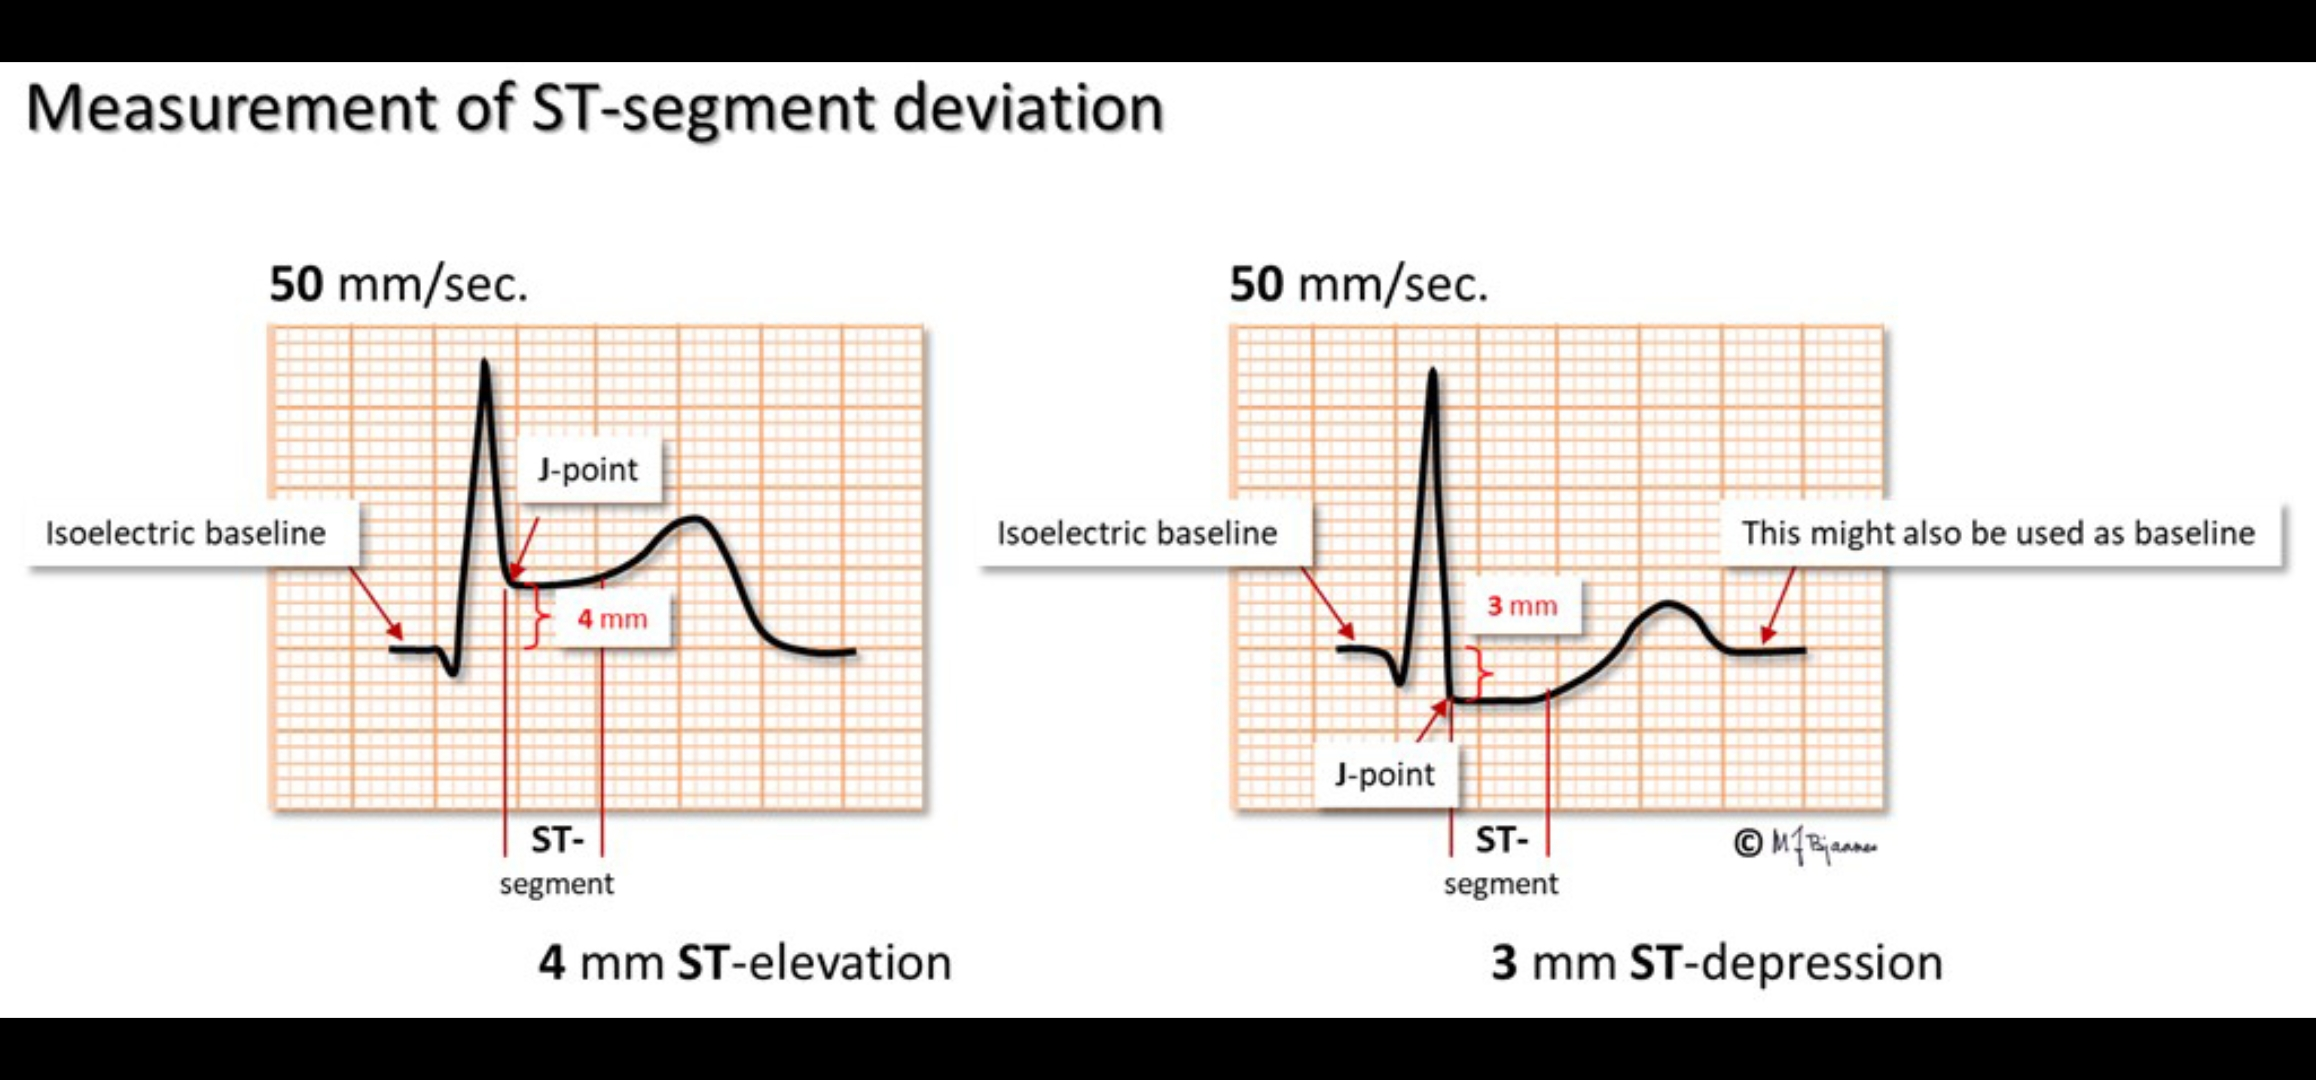




#Heart Functions 4. Num_major_vessels: Number of major vessels (0-3) colored by fluoroscopy

Fluoroscopy is an imaging tool to study the body such as skeletal, digestive, urinay, resporatory, and retroductive systems. Fluoroscopy helps to diagnose or treat certain parts of the body, including bones, muscles, and heart vessels.
In this dataset, Fluoscopy is used to help to see the blood flow through the coronary arteries.

#Heart Functions 5. Thallium_test: Thallium scintigraphy

・3 = Normal

・6 = Fixed defect

・7 = Reversible defect


＊Here is a problem about this feature, Thallium_test. The feature value from Data Description has three variables like above. but actual coded results in Thallium_test have four values such as value 0, 1, 2, and 3.

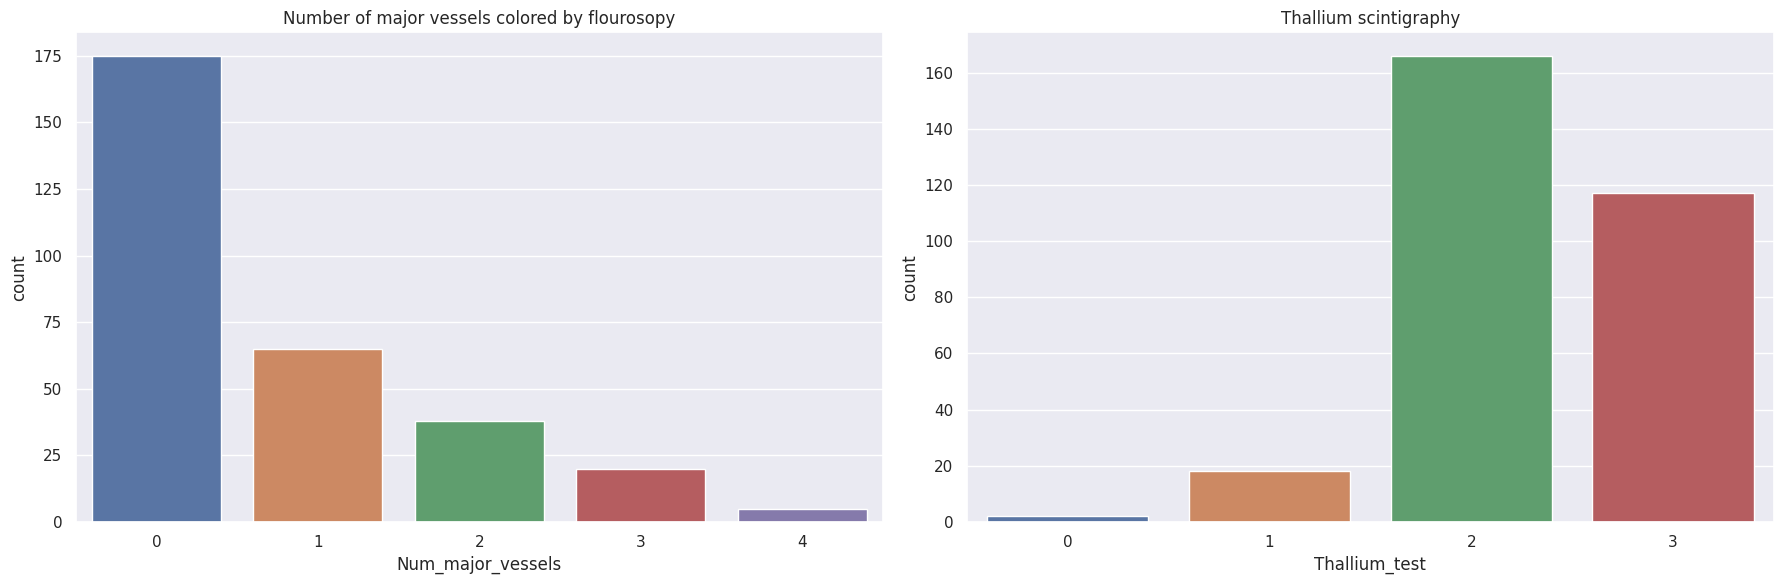

In [ ]:
def heart_functions2(data):
    """
    EDA with numeric variables
    """
    fig = plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    sns.countplot(x='Num_major_vessels', data=data)
    plt.title('Number of major vessels colored by flourosopy')

    # Thallium
    plt.subplot(1, 2, 2)
    sns.countplot(x='Thallium_test', data=data)
    plt.title('Thallium scintigraphy')

    plt.tight_layout()
    plt.show()


heart_functions2(df);

#Observations: Num_major_vessels

The majority of the subjects do not have any colored clot in blood vessels(=0), but the other half of the people (1,2,3,4) have at leat one clot.

Besides,as I mentioned, the graph of Thallium_test has four values.

**Num_major_vessels and Thallium_test vs. Sex**

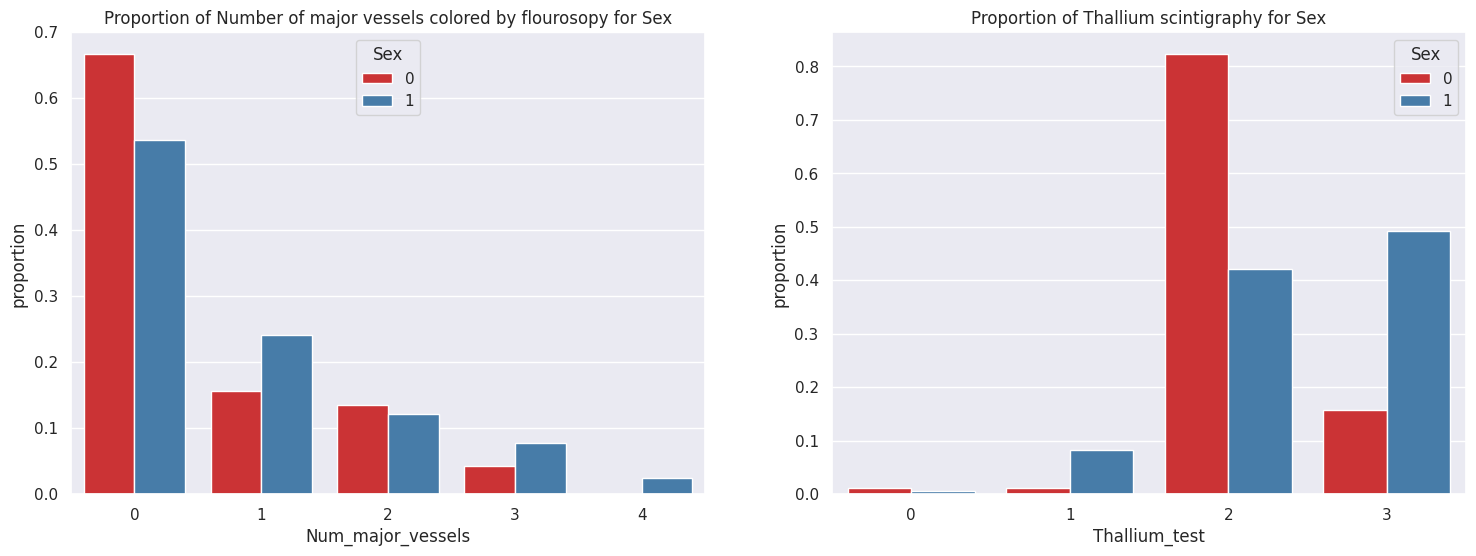

In [ ]:
def heart_functions2_sex(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Sex.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Number of major vessels colored by flourosopy for Sex')

    # Thallium test
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Thallium scintigraphy for Sex')
    plt.show()


heart_functions2_sex(df);

**Observations**

Num_major_vessels

・Male tends to have several clots in blood vessels more than Female.

Thallium_test

・In 2, malignant cases account for the majority, whereas in 3, benign cases account for the majority.

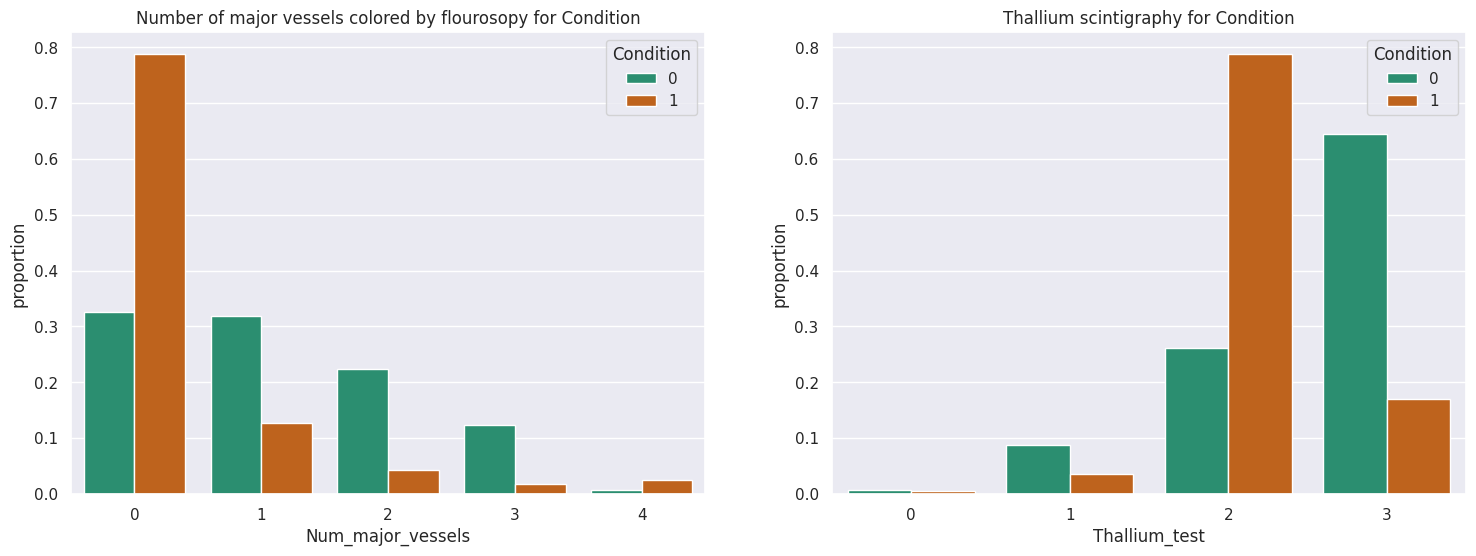

In [ ]:
def heart_functions2_condition(data):
    """
    Plot proportions of Num_major_vessels and Thallium_test for Condition.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Number of major vessels colored by flourosopy for Condition')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Thallium scintigraphy for Condition')
    plt.show()


heart_functions2_condition(df);


(0 = Benign , 1 = Malignant )


**Observations**



Num_major_vessels

・Even though the subjects do not have any clot in major vessels, they are strongly exposed to have Malignant condition.

Thallium_test (Same as above)

・In 2, malignant cases account for the majority, whereas in 3, benign cases account for the majority.

# **4-6. Feature Variable** - Age

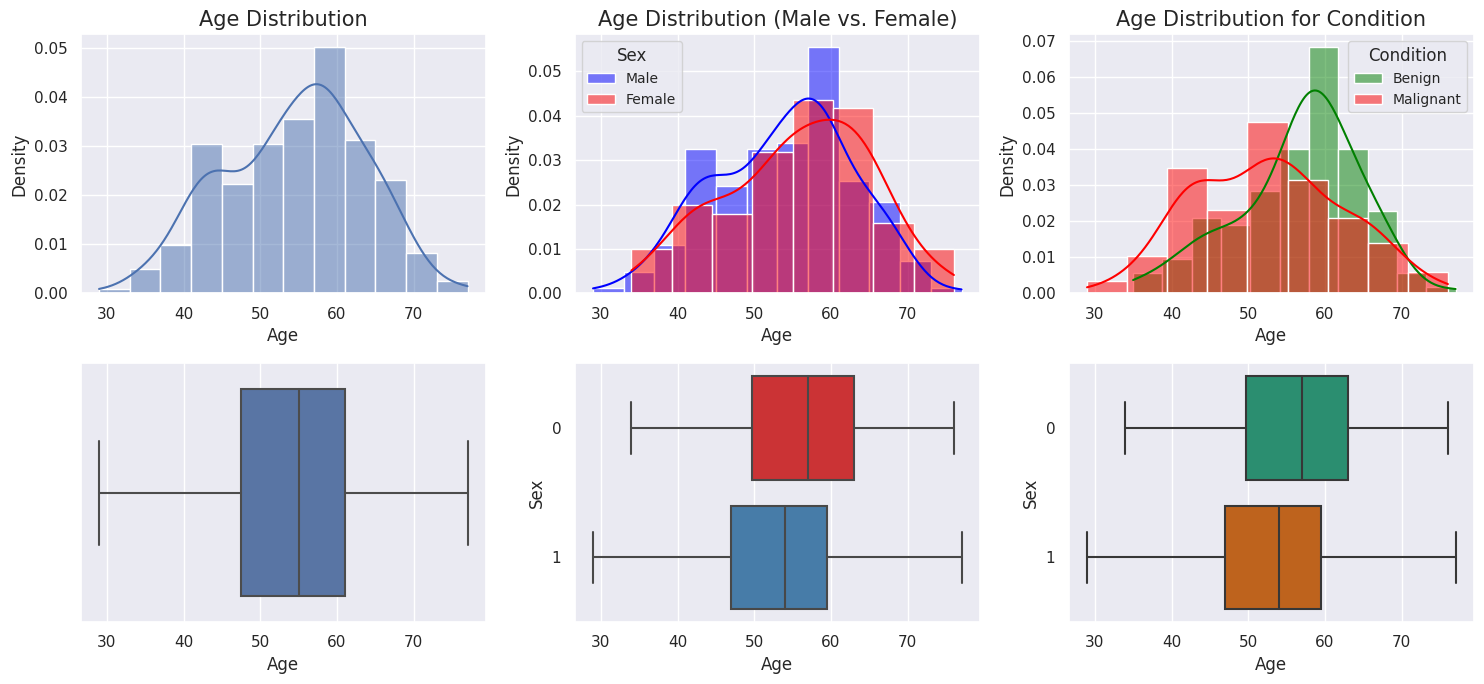

In [ ]:
def age_distribution(data):
    """
    Make a standard distribution and distributions for Sex
    """
    fig = plt.figure(figsize=(15, 7))

    # Age distribution
    plt.subplot(2, 3, 1)
    sns.histplot(data['Age'], stat='density', kde = True)
    plt.title('Age Distribution', fontsize=15)

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Age'], orient='h')


    # Age distribution for sex
    plt.subplot(2, 3, 2)
    female = df[df['Sex']==0]['Age']
    male = df[df['Sex']==1]['Age']
    sns.histplot(male, color='Blue', label='Male', stat='density', kde = True)
    sns.histplot(female, color='Red', label='Female', stat='density', kde = True)
    plt.title('Age Distribution (Male vs. Female)', fontsize=15)
    plt.legend(title='Sex', fontsize=10)

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Set1')


    # Age distribution for Condition
    plt.subplot(2, 3, 3)
    benign = df[df['Condition']==0]['Age']
    malignant = df[df['Condition']==1]['Age']

    sns.histplot(benign, color='Green', label='Benign', stat='density', kde = True)
    sns.histplot(malignant, color='Red', label='Malignant', stat='density', kde = True)
    plt.title('Age Distribution for Condition', fontsize=15)
    plt.legend(title='Condition', fontsize=10)

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Dark2')

    plt.tight_layout()
    plt.show()


age_distribution(df)



# Observations

・The most common age range is around 55-60 years, and similarly, the most common age range by gender is around 60 years for both women and men.

・Under age 50 is more likely to have Malignant than the older.

・People around the age of 60 are very likely to have Benign.